# SETUP

In [1]:
#Análise de Dados

import pandas as pd
import numpy as np

#Análise Gráfica

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#Análise Estátistica

import statsmodels.formula.api as smf

#ML

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, power_transform
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [11]:
df = pd.read_csv("D:\Projetos\Previsao_valor_seguro\PrevisaoValorSeguro\Data\S_AUTO_2021A.csv", sep=';')
df.head()

C:\Users\mateus.schualtz\AppData\Local\Temp\ipykernel_5716\2994325202.py:1: DtypeWarning: Columns (1,9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Projetos\Previsao_valor_seguro\PrevisaoValorSeguro\Data\S_AUTO_2021A.csv", sep=';')


,cod_apo,ENDOSSO,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,COD_MODELO,ANO_MODELO,COD_TARIF,REGIAO,...,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP
0,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,...,0,0,0,20201016,20201026,20201015,7,M,19740216,9371420
1,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,...,0,0,0,20201017,20201026,20201016,7,M,19740216,9371420
2,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,...,0,0,0,20201017,20201105,20201016,7,M,19740216,9030620
3,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,...,0,0,0,20200812,20200819,20200811,7,M,19740216,9371520
4,NaN,0000000000,0,1,1,1,004354-0,2009,10,11,...,0,0,0,20200812,20200819,20200811,7,M,19740216,0


# EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3747647 entries, 0 to 3747646
Data columns (total 24 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cod_apo     float64
 1   ENDOSSO     object 
 2   ITEM        int64  
 3   MODALIDADE  int64  
 4   TIPO_PROD   int64  
 5   COBERTURA   int64  
 6   COD_MODELO  object 
 7   ANO_MODELO  int64  
 8   COD_TARIF   object 
 9   REGIAO      object 
 10  COD_CONT    int64  
 11  EVENTO      int64  
 12  INDENIZ     object 
 13  VAL_SALVAD  object 
 14  D_SALVADO   int64  
 15  VAL_RESS    object 
 16  D_RESS      int64  
 17  D_AVI       int64  
 18  D_LIQ       int64  
 19  D_OCORR     int64  
 20  CAUSA       int64  
 21  SEXO        object 
 22  D_NASC      int64  
 23  CEP         int64  
dtypes: float64(1), int64(15), object(8)
memory usage: 686.2+ MB


In [ ]:
#Removendo Dados Nulos

df.dropna(inplace=True)

## Transformando Váriaiveis Categóricas em numéricas

Identificado a necessidade de transformar váriaveis categóricas em numéricas. A seguir será verificado cada categoria para entender qual método é melhor de se utilizar.

In [ ]:
print(df['regiao'].unique())
print(df['sexo'].unique())
print(df['fumante'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']
['yes' 'no']


Como a ordem das váriaivies não possui relevância, vou transformar as váriaveis em dummies.

In [ ]:
df = pd.get_dummies(df)

## Compreendendo se é necessário a normalização.

In [ ]:
df.describe()

,idade,imc,quantidade_filhos,custos_seguro,sexo_female,sexo_male,fumante_no,fumante_yes,regiao_northeast,regiao_northwest,regiao_southeast,regiao_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663815,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098367,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Os dados possuem medidas diferentes, dessa forma será necessário a normalização para que ao construir o modelo não exista ordem de grandeza.

In [ ]:
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns= df.columns)
df_norm.head()

,idade,imc,quantidade_filhos,custos_seguro,sexo_female,sexo_male,fumante_no,fumante_yes,regiao_northeast,regiao_northwest,regiao_southeast,regiao_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.473500,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## Análise de Correlação e Distribuição

In [ ]:
df_norm.corr()

,idade,imc,quantidade_filhos,custos_seguro,sexo_female,sexo_male,fumante_no,fumante_yes,regiao_northeast,regiao_northwest,regiao_southeast,regiao_southwest
idade,1.000000,0.109214,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
imc,0.109214,1.000000,0.012867,0.198285,-0.046438,0.046438,-0.003715,0.003715,-0.138191,-0.136030,0.270129,-0.006244
quantidade_filhos,0.042469,0.012867,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
custos_seguro,0.299008,0.198285,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sexo_female,0.020856,-0.046438,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sexo_male,-0.020856,0.046438,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
fumante_no,0.025019,-0.003715,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
fumante_yes,-0.025019,0.003715,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
regiao_northeast,0.002475,-0.138191,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
regiao_northwest,-0.000407,-0.136030,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


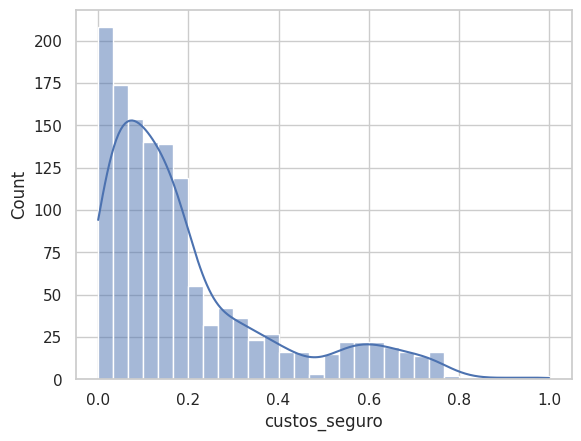

In [ ]:
sns.histplot(df_norm, x='custos_seguro', kde=True);

# Construção do Modelo

## Escolha de Váriaveis

Para a escolha das váriaveis vamos utilizar o método backward, onde iniciaremos o modelo com todas as váriaveis, e vamos retirando as que possuem um PValue maior que 5% (0,05), que nesse caso são as que não é possível rejeitar a hipótese nula de que não existe muticolinariedade.

In [ ]:
df_norm.columns

Index(['idade', 'imc', 'quantidade_filhos', 'custos_seguro', 'sexo_female',
       'sexo_male', 'fumante_no', 'fumante_yes', 'regiao_northeast',
       'regiao_northwest', 'regiao_southeast', 'regiao_southwest'],
      dtype='object')

In [ ]:
function = 'custos_seguro~idade+imc+quantidade_filhos+sexo_female+sexo_male+fumante_no+fumante_yes+regiao_northeast+regiao_northwest+regiao_southeast+regiao_southwest-1'

model = smf.ols(formula = function, data=df_norm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:49:37   Log-Likelihood:                 1230.8
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
idade                 0.1886      0.00

Ao fazer a seleção, foi possível compreender que ao retirar o intercepto, temos já todas as variaveis explictativas dos modelo (x).


E a váriavel target (y) o custos_seguro.

##Separando massa de treino e teste

In [ ]:
x = df_norm.drop(columns='custos_seguro')
y = df_norm[['custos_seguro']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

## Modelos

### Regressão Linear

In [ ]:
lr = LinearRegression()

lr.fit(x_train, y_train);

In [ ]:
y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr = lr.predict(x_test)
r_sqt_lr = lr.score(x, y).round(4)

print(f'R^2:{r_sqt_lr}')
print(f'MAE Train:{metrics.mean_absolute_error(y_train, y_pred_train_lr).round(4)}')
print(f'MAE Test:{metrics.mean_absolute_error(y_test, y_pred_test_lr).round(4)}')
print(f'MSE Train:{metrics.mean_squared_error(y_train, y_pred_train_lr).round(4)}')
print(f'MSE Test:{metrics.mean_squared_error(y_test, y_pred_test_lr).round(4)}')


R^2:0.7507
MAE Train:0.0672
MAE Test:0.0662
MSE Train:0.0095
MSE Test:0.0085


Como o R^2 não foi conforme o esperado, vamos treinar outros modelos (ensemble) para verificar se conseguimos uma melhora nas métricas do modelo.

### RandomForest

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train);

<ipython-input-58-5df3396e3a54>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train);


In [ ]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)
r_sqt_rf = rf.score(x, y).round(4)

print(f'R^2:{r_sqt_rf}')
print(f'MAE Train:{metrics.mean_absolute_error(y_train, y_pred_train_rf).round(4)}')
print(f'MAE Test:{metrics.mean_absolute_error(y_test, y_pred_test_rf).round(4)}')
print(f'MSE Train:{metrics.mean_squared_error(y_train, y_pred_train_rf).round(4)}')
print(f'MSE Test:{metrics.mean_squared_error(y_test, y_pred_test_rf).round(4)}')


R^2:0.9515
MAE Train:0.0163
MAE Test:0.0417
MSE Train:0.0009
MSE Test:0.0055


### ADABoosting

In [ ]:
ada = AdaBoostRegressor()

ada.fit(x_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)
r_sqt_ada = ada.score(x, y).round(4)

print(f'R^2:{r_sqt_ada}')
print(f'MAE Train:{metrics.mean_absolute_error(y_train, y_pred_train_ada).round(4)}')
print(f'MAE Test:{metrics.mean_absolute_error(y_test, y_pred_test_ada).round(4)}')
print(f'MSE Train:{metrics.mean_squared_error(y_train, y_pred_train_ada).round(4)}')
print(f'MSE Test:{metrics.mean_squared_error(y_test, y_pred_test_ada).round(4)}')


R^2:0.8323
MAE Train:0.0612
MAE Test:0.0659
MSE Train:0.0061
MSE Test:0.0069


### GradientBoosting

In [ ]:
grb = GradientBoostingRegressor()

grb.fit(x_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_train_grb = grb.predict(x_train)
y_pred_test_grb = grb.predict(x_test)
r_sqt_grb = grb.score(x, y).round(4)

print(f'R^2:{r_sqt_grb}')
print(f'MAE Train:{metrics.mean_absolute_error(y_train, y_pred_train_grb).round(4)}')
print(f'MAE Test:{metrics.mean_absolute_error(y_test, y_pred_test_grb).round(4)}')
print(f'MSE Train:{metrics.mean_squared_error(y_train, y_pred_train_grb).round(4)}')
print(f'MSE Test:{metrics.mean_squared_error(y_test, y_pred_test_grb).round(4)}')


R^2:0.8965
MAE Train:0.0332
MAE Test:0.0384
MSE Train:0.0036
MSE Test:0.0048


## Resultado dos modelos

In [ ]:
result = pd.DataFrame({'Modelos':['Regressão Linear','RandomForest','AdaBoosting','GradientBoosting'],
                      'R^2':[r_sqt_lr,r_sqt_rf,r_sqt_ada,r_sqt_grb],
                      'MAE Train':[metrics.mean_absolute_error(y_train, y_pred_train_lr).round(4),metrics.mean_absolute_error(y_train, y_pred_train_rf).round(4),metrics.mean_absolute_error(y_train, y_pred_train_ada).round(4),metrics.mean_absolute_error(y_train, y_pred_train_grb).round(4)],
                      'MAE Test':[metrics.mean_absolute_error(y_test, y_pred_test_lr).round(4),metrics.mean_absolute_error(y_test, y_pred_test_rf).round(4),metrics.mean_absolute_error(y_test, y_pred_test_ada).round(4),metrics.mean_absolute_error(y_test, y_pred_test_grb).round(4)],
                      'MSE Train': [metrics.mean_squared_error(y_train, y_pred_train_lr).round(4),metrics.mean_squared_error(y_train, y_pred_train_rf).round(4),metrics.mean_squared_error(y_train, y_pred_train_ada).round(4),metrics.mean_squared_error(y_train, y_pred_train_grb).round(4)],
                      'MSE Test': [metrics.mean_squared_error(y_test, y_pred_test_lr).round(4),metrics.mean_squared_error(y_test, y_pred_test_rf).round(4),metrics.mean_squared_error(y_test, y_pred_test_ada).round(4),metrics.mean_squared_error(y_test, y_pred_test_grb).round(4)]
                       })
display(result)

,Modelos,R^2,MAE Train,MAE Test,MSE Train,MSE Test
0,Regressão Linear,0.7507,0.0672,0.0662,0.0095,0.0085
1,RandomForest,0.9515,0.0163,0.0417,0.0009,0.0055
2,AdaBoosting,0.8323,0.0612,0.0659,0.0061,0.0069
3,GradientBoosting,0.8965,0.0332,0.0384,0.0036,0.0048


Ao comparar as métricas podemos chegar a conclusão que de maneira geral o modelo que melhor performou foi o GradienteBoosting, apesar do seu R^2 ser menor do que o RandomForest, podemos ver que existe um erro parecido quando olhamos para as métricas de treino e teste, portanto possui uma tendência menor de causar problemas de overfiting. Para que seja possível melhorar o R^2 e se tornar o modelo ideal, vamos tunar utilizando os hiperparâmetros.

# Tunning com Hiperparâmetros

In [ ]:
parameters = {'max_depth': [5,10,20],
              'min_samples_leaf': [2,3,4],
              'n_estimators': [100,200,500],
              'min_samples_split': [2,3]}


grid_search = GridSearchCV(grb, parameters, scoring= 'r2', cv=2, n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Resultados do GridSearch')
print(f'Melhores Estimadores: {grid_search.best_estimator_}')
print(f'Melhores Parametros: {grid_search.best_params_}')

Resultados do GridSearch
Melhores Estimadores: GradientBoostingRegressor(max_depth=5, min_samples_leaf=4)
Melhores Parametros: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_model = grid_search.best_estimator_
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grb_tuning = GradientBoostingRegressor(
  alpha = 0.9,
  ccp_alpha = 0.0,
  criterion = 'friedman_mse',
  init = None,
  learning_rate = 0.1,
  loss = 'squared_error',
  max_depth = 5,
  max_features = None,
  max_leaf_nodes = None,
  min_impurity_decrease = 0.0,
  min_samples_leaf = 4,
  min_samples_split = 2,
  min_weight_fraction_leaf = 0.0,
  n_estimators = 200,
  n_iter_no_change = None,
  random_state = None,
  subsample = 1.0,
  tol = 0.0001,
  validation_fraction = 0.1,
  verbose = 0,
  warm_start = False
)

In [ ]:
grb_tuning.fit(x_train, y_train)

grb_tuning_pred_train = grb_tuning.predict(x_train)
grb_tuning_pred_test = grb_tuning.predict(x_test)

r_sq_tuning = grb_tuning.score(x,y).round(4)

mae_tuning_train = metrics.mean_absolute_error(y_train, grb_tuning_pred_train).round(4)
mae_tuning_test = metrics.mean_absolute_error(y_test, grb_tuning_pred_test).round(4)

mse_tuning_train = metrics.mean_squared_error(y_train, grb_tuning_pred_train).round(4)
mse_tuning_test = metrics.mean_squared_error(y_test, grb_tuning_pred_test).round(4)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Resultados e Comparações

In [ ]:
result_tuning = {'Modelos': 'GradientBoosting Tuning', 'R^2': r_sq_tuning, 'MAE Train': mae_tuning_train , 'MAE Test': mae_tuning_test, 'MSE Train': mse_tuning_train, 'MSE Test': mse_tuning_test}


result = result.append(result_tuning, ignore_index=True)


display(result)


<ipython-input-141-a9dace488756>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(result_tuning, ignore_index=True)


,Modelos,R^2,MAE Train,MAE Test,MSE Train,MSE Test
0,Regressão Linear,0.7507,0.0672,0.0662,0.0095,0.0085
1,RandomForest,0.9515,0.0163,0.0417,0.0009,0.0055
2,AdaBoosting,0.8323,0.0612,0.0659,0.0061,0.0069
3,GradientBoosting,0.8965,0.0332,0.0384,0.0036,0.0048
4,GradientBoosting Tuning,0.9332,0.0231,0.0427,0.0017,0.0058


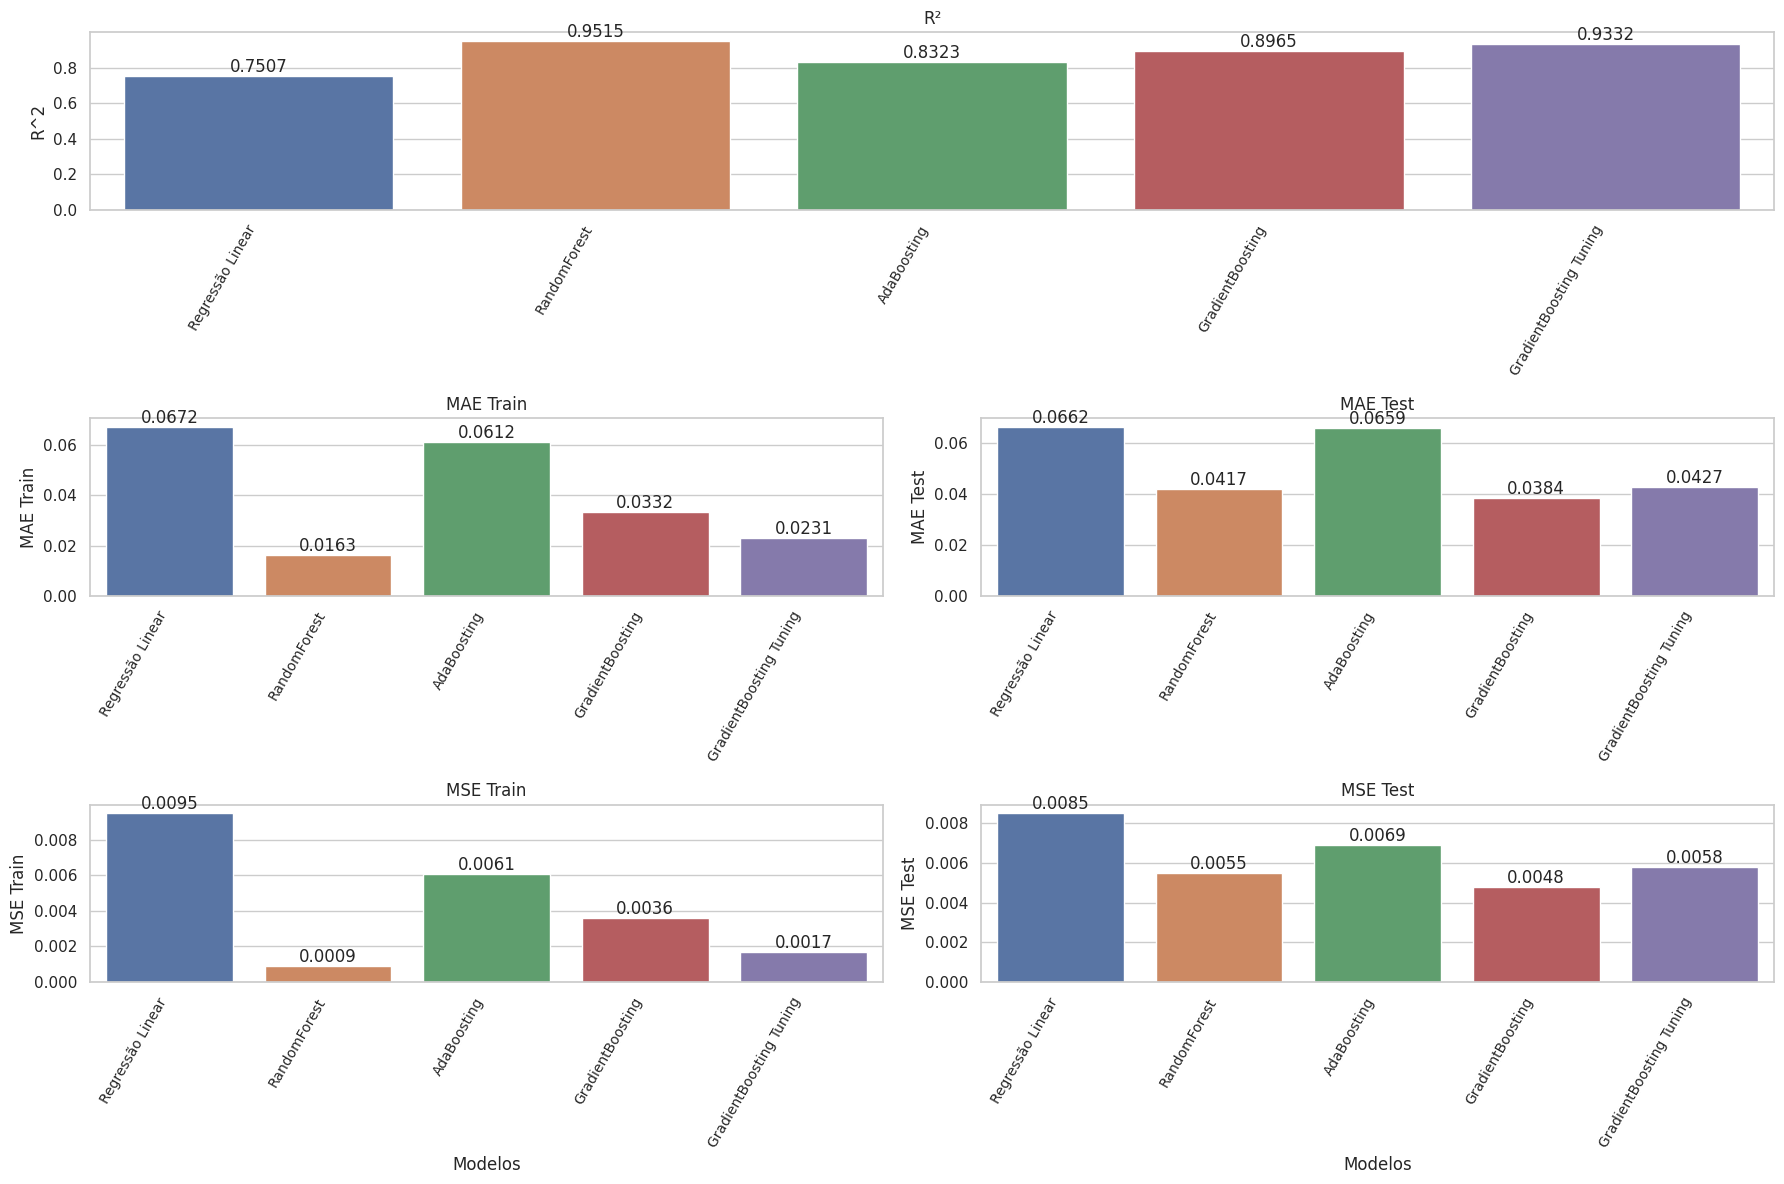

In [ ]:
#Configuração do Gráfico
sns.set_palette("Set2")
sns.set(style="whitegrid")

# Criação do subplot com a configuração personalizada
fig = plt.figure(figsize=(18, 12))

# Gráfico R²
ax1 = plt.subplot(3, 2, (1, 2))
sns.barplot(data=result, x='Modelos', y='R^2', ax=ax1)
ax1.set_xticklabels(result['Modelos'], rotation=60, ha='right')
ax1.set_title("R²")
for i, v in enumerate(result['R^2']):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Gráfico MAE Train
ax2 = plt.subplot(3, 2, 3)
sns.barplot(data=result, x='Modelos', y='MAE Train', ax=ax2)
ax2.set_xticklabels(result['Modelos'], rotation=60, ha='right')
ax2.set_title("MAE Train")
for i, v in enumerate(result['MAE Train']):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# Gráfico MAE Test
ax3 = plt.subplot(3, 2, 4)
sns.barplot(data=result, x='Modelos', y='MAE Test', ax=ax3)
ax3.set_xticklabels(result['Modelos'], rotation=60, ha='right')
ax3.set_title("MAE Test")
for i, v in enumerate(result['MAE Test']):
    ax3.text(i, v, str(v), ha='center', va='bottom')

# Gráfico MSE Train
ax4 = plt.subplot(3, 2, 5)
sns.barplot(data=result, x='Modelos', y='MSE Train', ax=ax4)
ax4.set_xticklabels(result['Modelos'], rotation=60, ha='right')
ax4.set_title("MSE Train")
for i, v in enumerate(result['MSE Train']):
    ax4.text(i, v, str(v), ha='center', va='bottom')

# Gráfico MSE Test
ax5 = plt.subplot(3, 2, 6)
sns.barplot(data=result, x='Modelos', y='MSE Test', ax=ax5)
ax5.set_xticklabels(result['Modelos'], rotation=60, ha='right')
ax5.set_title("MSE Test")
for i, v in enumerate(result['MSE Test']):
    ax5.text(i, v, str(v), ha='center', va='bottom')

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('')


plt.tight_layout()
plt.show()

Ao realizar a tunagem do modelo, obtivemos uma melhora significativa na métrica R². No entanto, observamos um aumento ligeiro no risco de overfitting em comparação com o modelo sem hiperparâmetros. Em relação ao RandomForest, que apresentou o melhor desempenho em termos de R², nosso modelo com hiperparâmetros obteve um resultado bastante próximo. No entanto, a vantagem do nosso modelo ajustado é a menor propensão ao overfitting, o que o torna uma  excelente opção em comparação com os demais modelos avaliados.